In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

- Find out number of passengers that were carried by different air carriers

In [9]:
passengers = pd.read_csv('data/passengers_cleaned.csv')
passengers.shape

(300000, 39)

In [10]:
passengers.head()

,Unnamed: 0,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0,4,4,120000,600,557,0,0,1447,811,...,US,United States,6,698,1,2019,10,3,F,DU
1,1,4,4,34600,148,102,0,0,296,373,...,US,United States,4,483,1,2017,5,1,F,DU
2,2,0,2,7000,18,14,0,0,48,44,...,US,United States,4,415,1,2017,12,1,L,DU
3,3,197,187,6954343,27683,21703,0,0,414,17908,...,US,United States,6,694,1,2017,1,1,F,DU
4,4,0,2,69285,288,95,0,0,877,275,...,US,United States,6,617,1,2016,9,2,F,IU


In [47]:
number_of_passengers_per_carrier = passengers.groupby(
    ["unique_carrier"],as_index = False
)[['passengers']].sum()

In [35]:
number_of_passengers_per_carrier = number_of_passengers_per_carrier[number_of_passengers_per_carrier['passengers'] > 0]

Text(0, 0.5, 'Number Of Passengers')

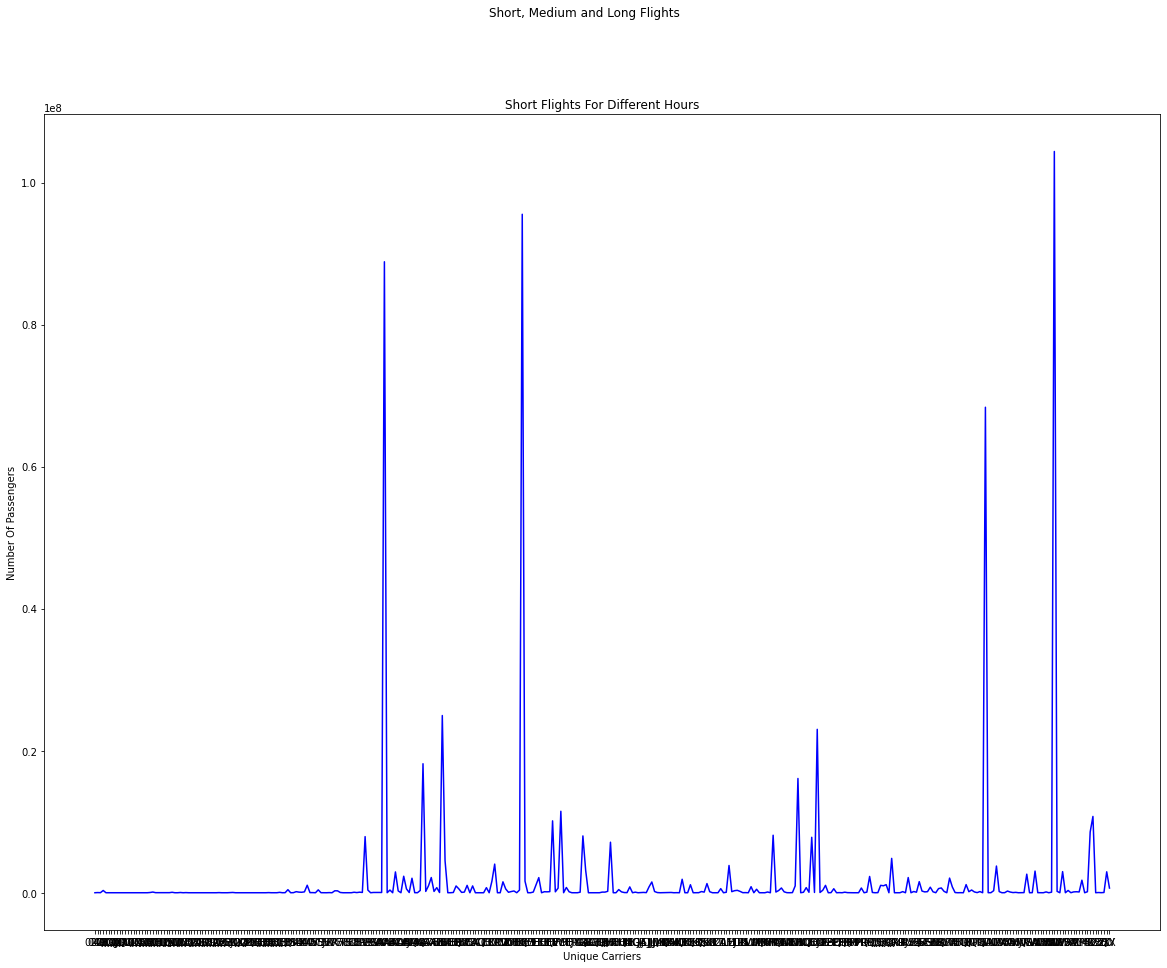

In [48]:
fig, axes = plt.subplots(figsize=(20, 15))
fig.suptitle('Short, Medium and Long Flights')
#Short FLights
sns.lineplot(ax=axes, x=number_of_passengers_per_carrier.unique_carrier, y=number_of_passengers_per_carrier.passengers,color='b')
axes.set_title('Short Flights For Different Hours')
axes.set_xlabel('Unique Carriers')
axes.set_ylabel('Number Of Passengers')

In [43]:
fuel_consum = pd.read_csv('data/fuel_comsumption.csv')

In [45]:
fuel_per_carrier = fuel_consum.groupby('unique_carrier',as_index=False)[['total_gallons']].sum()

In [46]:
fuel_per_carrier

,unique_carrier,total_gallons
0,09Q,41034111.0
1,0JQ,838615.0
2,0WQ,3253401.0
3,1BQ,6672792.0
4,23Q,856284.0
...,...,...
57,X9,176878857.0
58,XP,19013295.0
59,YV,0.0
60,YX,287098389.0


In [50]:
data_all = pd.merge(fuel_per_carrier,number_of_passengers_per_carrier, on = "unique_carrier")

In [58]:
data_all['total_gallons']/10000

,total_gallons
0,4103.4111
1,83.8615
2,325.3401
3,667.2792
4,85.6284
...,...
57,17687.8857
58,1901.3295
59,0.0000
60,28709.8389


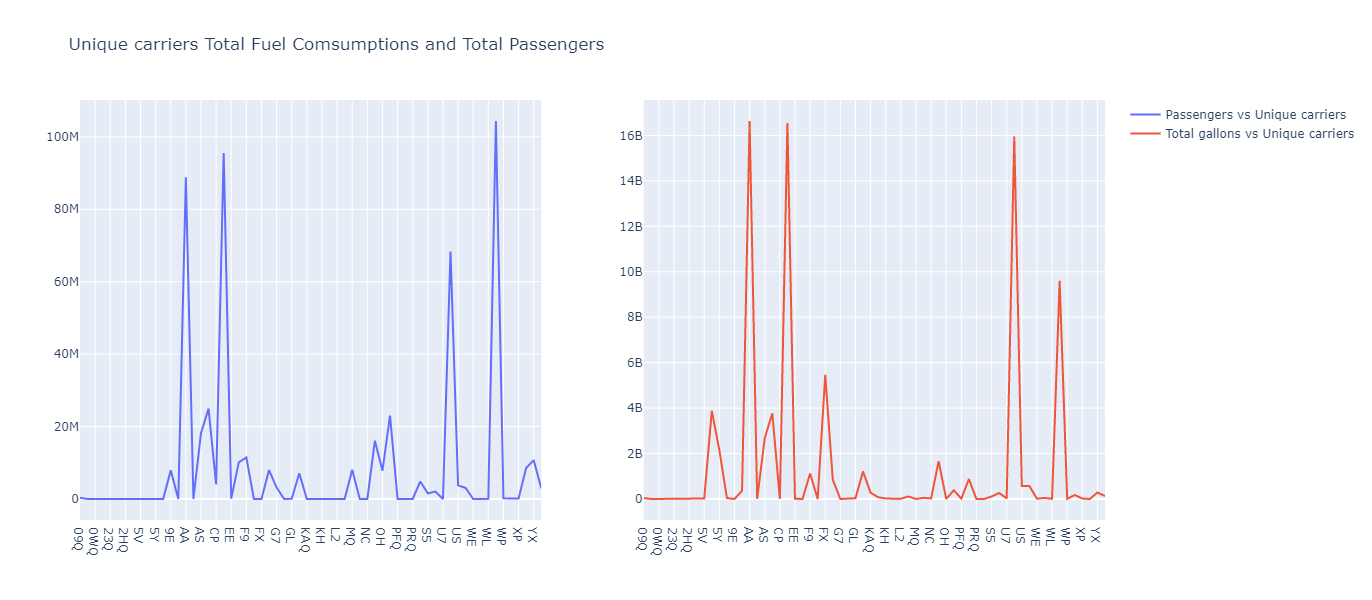

In [75]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=data_all.unique_carrier, y=data_all.passengers,name = "Passengers vs Unique carriers"),
    row=1, col=1,
)

fig.add_trace(
    go.Scatter(x=data_all.unique_carrier, y=data_all.total_gallons,name = "Total gallons vs Unique carriers"),
    row=1, col=2
)

fig.update_layout(height=600, width=1200, title_text="Unique carriers Total Fuel Comsumptions and Total Passengers")
fig.show()